#     Plot latitude and longitude curtain plots


## Setup imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import notebook_prepare as pre

## Define plotting function

In [2]:
def plot_curtain(df,plotdir,key,label) :

    """
    Plot a latitude curtain plot
    """

    # Define the figure.
    fix,ax = plt.subplots(1,3,sharex='all',sharey='all',figsize=(25,15))

    # Define the data.
    alt_data = df['Altitude'][:]
    lat_data = df['Latitude'][:]
    a_min, a_avg, a_max, m_min, m_avg, m_max, bl_min, bl_avg, bl_max = pre.read_data_values(df)

    # Calculate the minimum and maximum limits.
    min = np.nanmin([np.nanmin(a_avg),np.nanmin(m_avg)])
    max = np.nanmax([np.nanmax(a_avg),np.nanmax(m_avg)])

    # Calculate the difference between model and observations.
    diff_data = [x-y for x,y in zip(m_avg,a_avg)]

    # Determine the min and max.
    diff_min = np.nanmin(diff_data)
    diff_max = np.nanmax(diff_data)
    limits = np.sqrt(np.nanmax([diff_min**2,diff_max**2]))
    diff_min_lim = limits*-1
    diff_max_lim = limits

    # Plot the aircraft data.
    plt0 = ax[0].scatter(lat_data,alt_data,c=a_avg,marker='X',s=100,cmap=plt.cm.Spectral_r,vmin=min,vmax=max)
    ax[0].set_ylabel('Altitude / m',fontsize=40,labelpad=20)
    ax[0].tick_params(labelsize=30)
    ax[0].grid()
    ax[0].set_title('Aircraft',fontsize=40)
    cb0 = plt.colorbar(plt0,ax=ax[0],orientation='vertical',pad=0.1,extend='both')
    cb0.set_label(label,fontsize=30,labelpad=10)
    cb0.ax.tick_params(labelsize=20)

    # Plot the model data.
    plt1 = ax[1].scatter(lat_data,alt_data,c=m_avg,marker='X',s=100,cmap=plt.cm.Spectral_r,vmin=min,vmax=max)
    ax[1].set_xlabel('Latitude / degrees north',fontsize=40,labelpad=20)
    ax[1].tick_params(labelsize=30)
    ax[1].grid()
    ax[1].set_title('Model',fontsize=40)
    cb1 = plt.colorbar(plt1,ax=ax[1],orientation='vertical',pad=0.1,extend='both')
    cb1.set_label(label,fontsize=30,labelpad=10)
    cb1.ax.tick_params(labelsize=20)

    # Plot the difference data.
    plt2 = ax[2].scatter(lat_data,alt_data,c=diff_data,marker='X',s=100,cmap=plt.cm.RdBu_r,vmin=diff_min_lim,vmax=diff_max_lim)
    ax[2].tick_params(labelsize=30)
    ax[2].grid()
    ax[2].set_title('Difference',fontsize=40)
    cb2 = plt.colorbar(plt2,ax=ax[2],orientation='vertical',pad=0.1,extend='both')
    cb2.set_label(label+' (Model - Observation)',fontsize=30,labelpad=10)
    cb2.ax.tick_params(labelsize=20)

    plt.show()
    # Save the figure.
    #plt.savefig(plotdir+key+'_Latitude_Curtain_Plot.png')
    #plt.close()

    """
    Plot a longitude curtain plot
    """

    # Define the figure.
    fix,ax = plt.subplots(1,3,sharex='all',sharey='all',figsize=(25,15))

    # Define the data.
    alt_data = df['Altitude'][:]
    lon_data = df['Longitude'][:]
    a_min, a_avg, a_max, m_min, m_avg, m_max, bl_min, bl_avg, bl_max = pre.read_data_values(df)

    # Calculate the minimum and maximum limits.
    min = np.nanmin([np.nanmin(a_avg),np.nanmin(m_avg)])
    max = np.nanmax([np.nanmax(a_avg),np.nanmax(m_avg)])

    # Calculate the difference between model and observations.
    diff_data = [x-y for x,y in zip(m_avg,a_avg)]

    # Determine the min and max.
    diff_min = np.nanmin(diff_data)
    diff_max = np.nanmax(diff_data)
    limits = np.sqrt(np.nanmax([diff_min**2,diff_max**2]))
    diff_min_lim = limits*-1
    diff_max_lim = limits

    # Plot the aircraft data.
    plt0 = ax[0].scatter(lon_data,alt_data,c=a_avg,marker='X',s=100,cmap=plt.cm.Spectral_r,vmin=min,vmax=max)
    ax[0].set_ylabel('Altitude / m',fontsize=40,labelpad=20)
    ax[0].tick_params(labelsize=30)
    ax[0].grid()
    ax[0].set_title('Aircraft',fontsize=40)
    cb0 = plt.colorbar(plt0,ax=ax[0],orientation='vertical',pad=0.1,extend='both')
    cb0.set_label(label,fontsize=30,labelpad=10)
    cb0.ax.tick_params(labelsize=20)

    # Plot the model data.
    plt1 = ax[1].scatter(lon_data,alt_data,c=m_avg,marker='X',s=100,cmap=plt.cm.Spectral_r,vmin=min,vmax=max)
    ax[1].set_xlabel('Longitude / degrees east',fontsize=40,labelpad=20)
    ax[1].tick_params(labelsize=30)
    ax[1].grid()
    ax[1].set_title('Model',fontsize=40)
    cb1 = plt.colorbar(plt1,ax=ax[1],orientation='vertical',pad=0.1,extend='both')
    cb1.set_label(label,fontsize=30,labelpad=10)
    cb1.ax.tick_params(labelsize=20)

    # Plot the difference data.
    plt2 = ax[2].scatter(lon_data,alt_data,c=diff_data,marker='X',s=100,cmap=plt.cm.RdBu_r,vmin=diff_min_lim,vmax=diff_max_lim)
    ax[2].tick_params(labelsize=30)
    ax[2].grid()
    ax[2].set_title('Difference',fontsize=40)
    cb2 = plt.colorbar(plt2,ax=ax[2],orientation='vertical',pad=0.1,extend='both')
    cb2.set_label(label+' (Model - Observation)',fontsize=30,labelpad=10)
    cb2.ax.tick_params(labelsize=20)

    plt.show()
    # Save the figure.
    #plt.savefig(plotdir+key+'_Longitude_Curtain_Plot.png')
    #plt.close()

## Specify the flight number

In [3]:
# Set the flight number.
# Current valid options are M270, M296 and M302.
flight_number = 'M296'  

## Prepare the data and plot for each pollution species

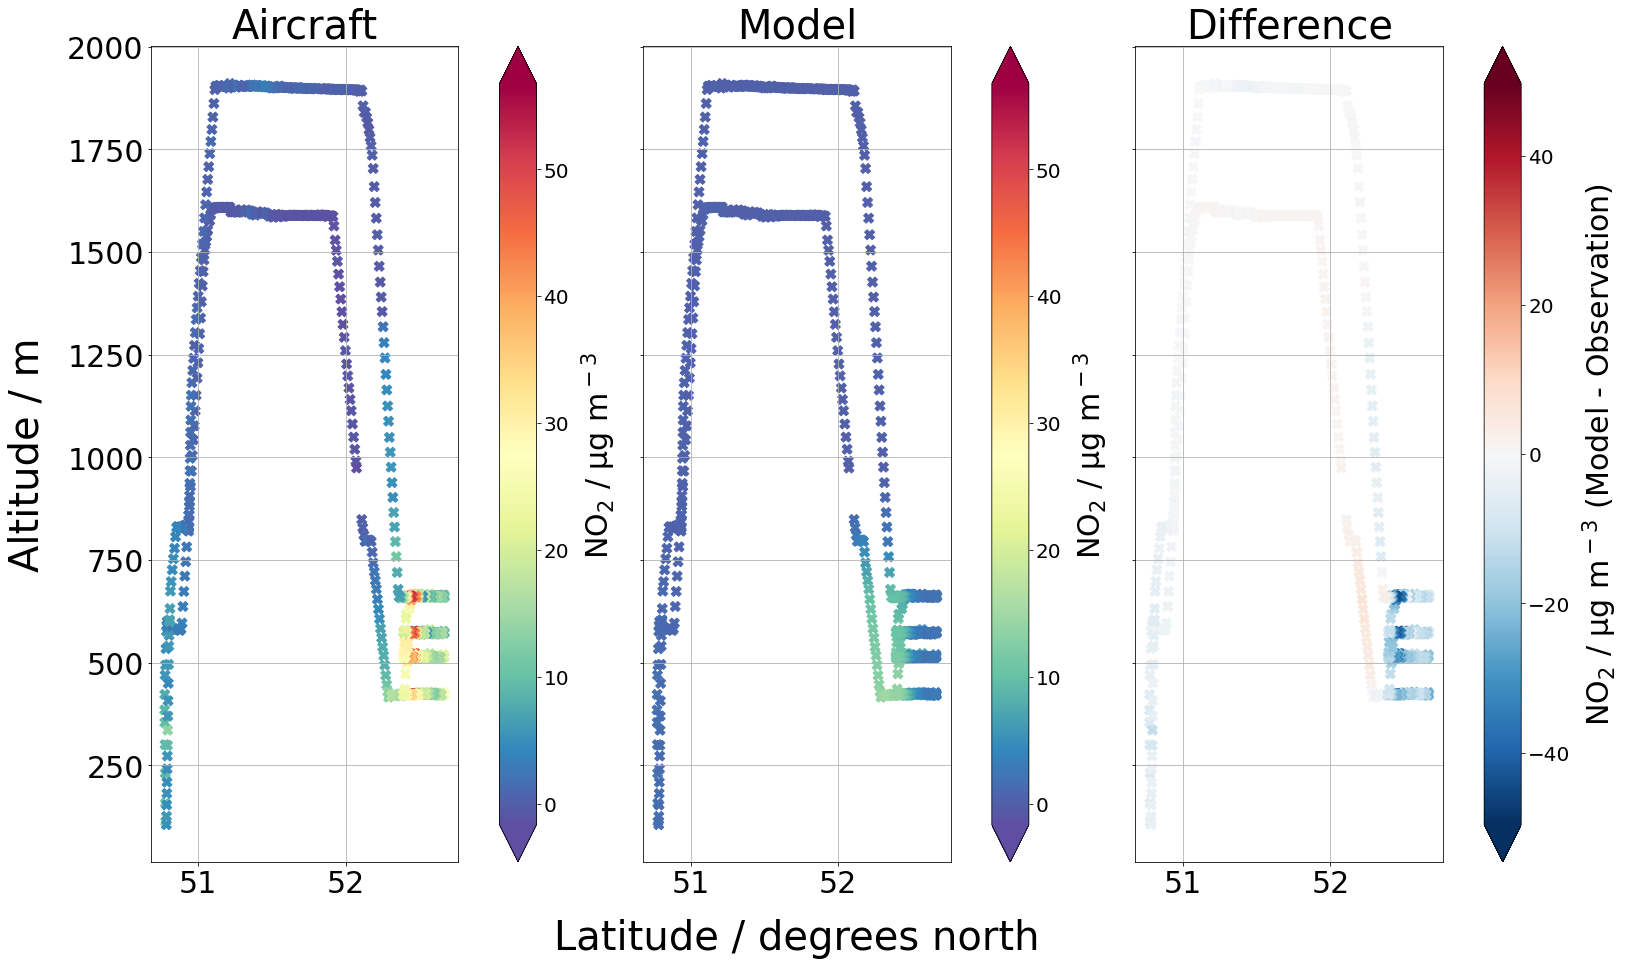

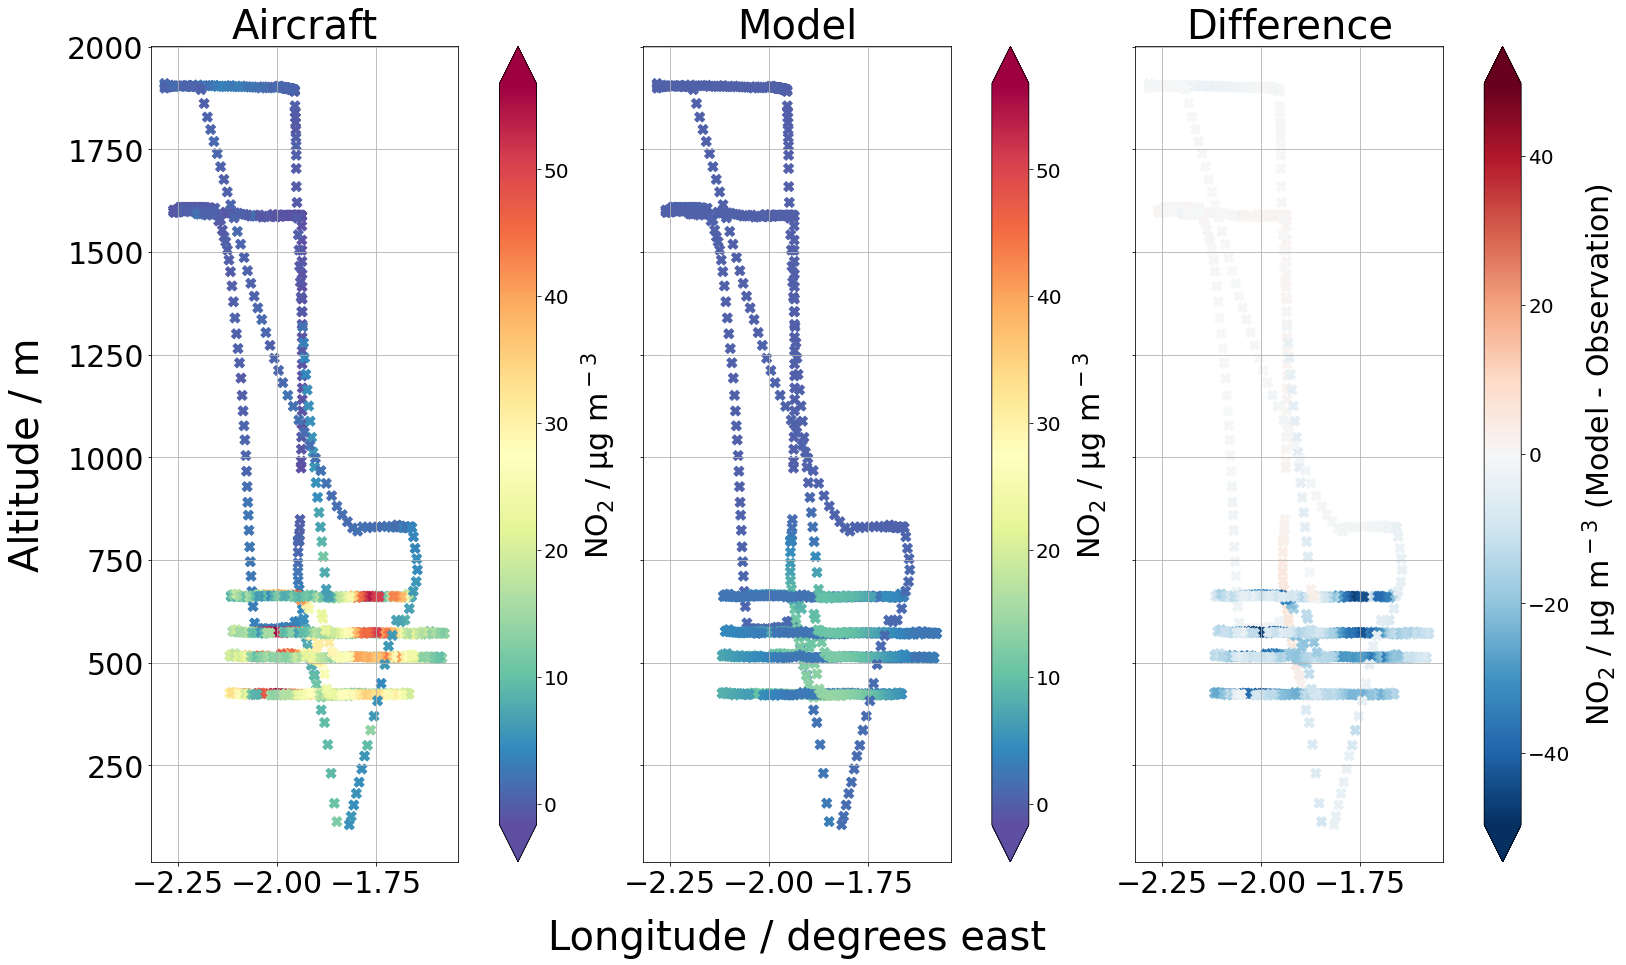

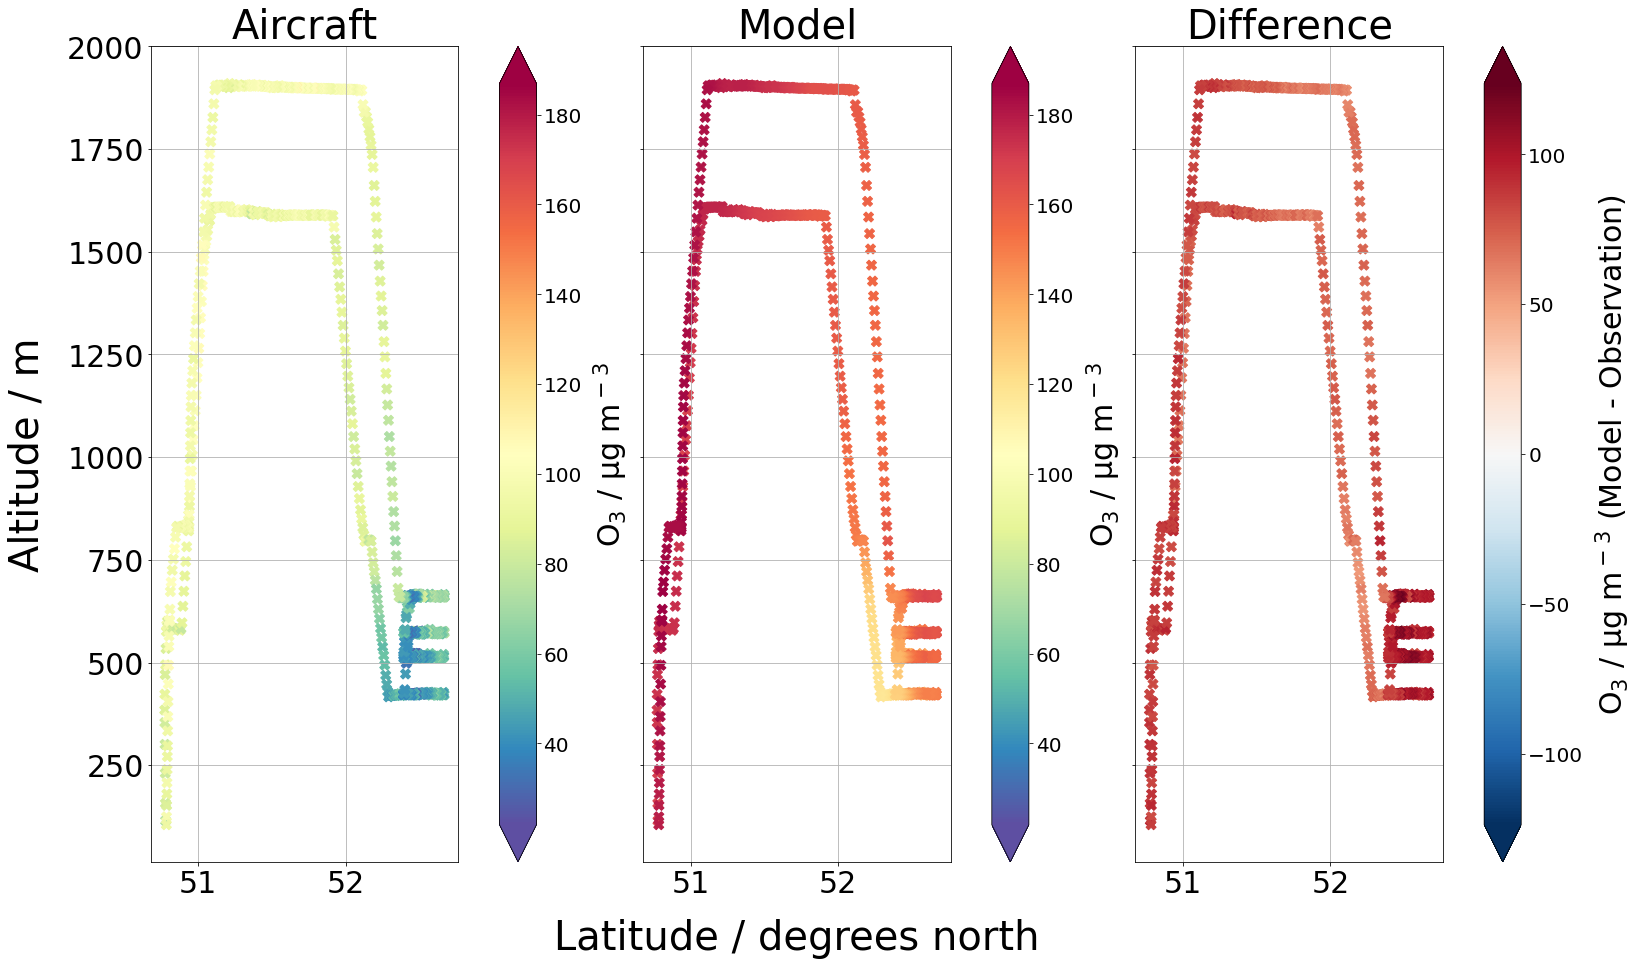

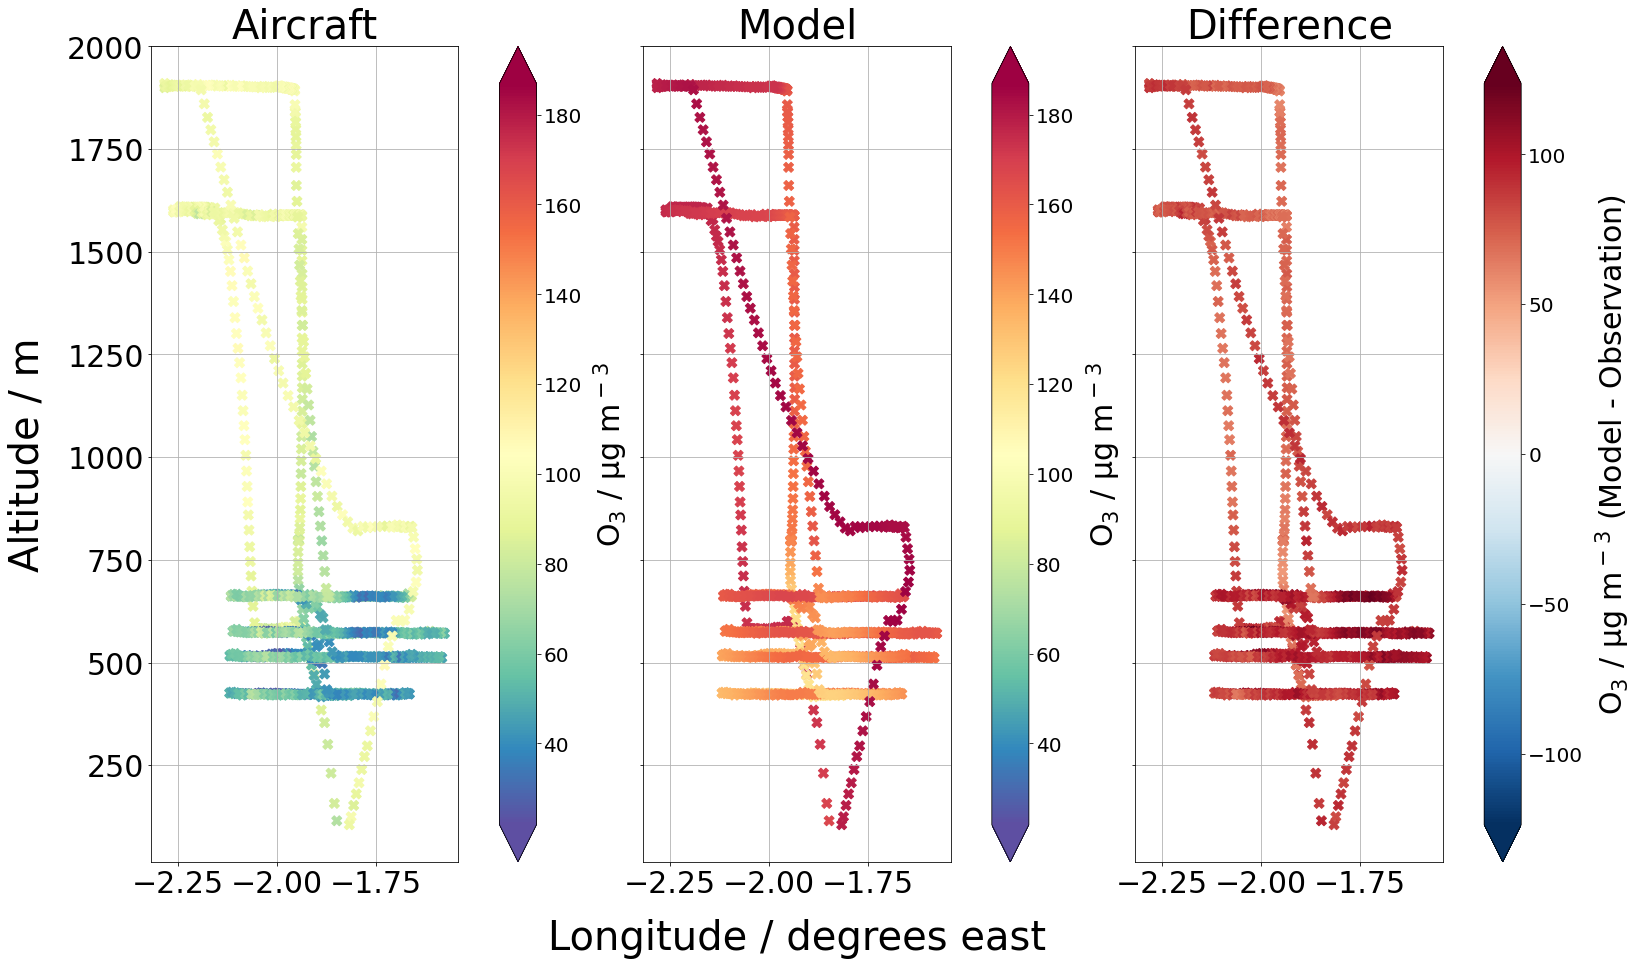

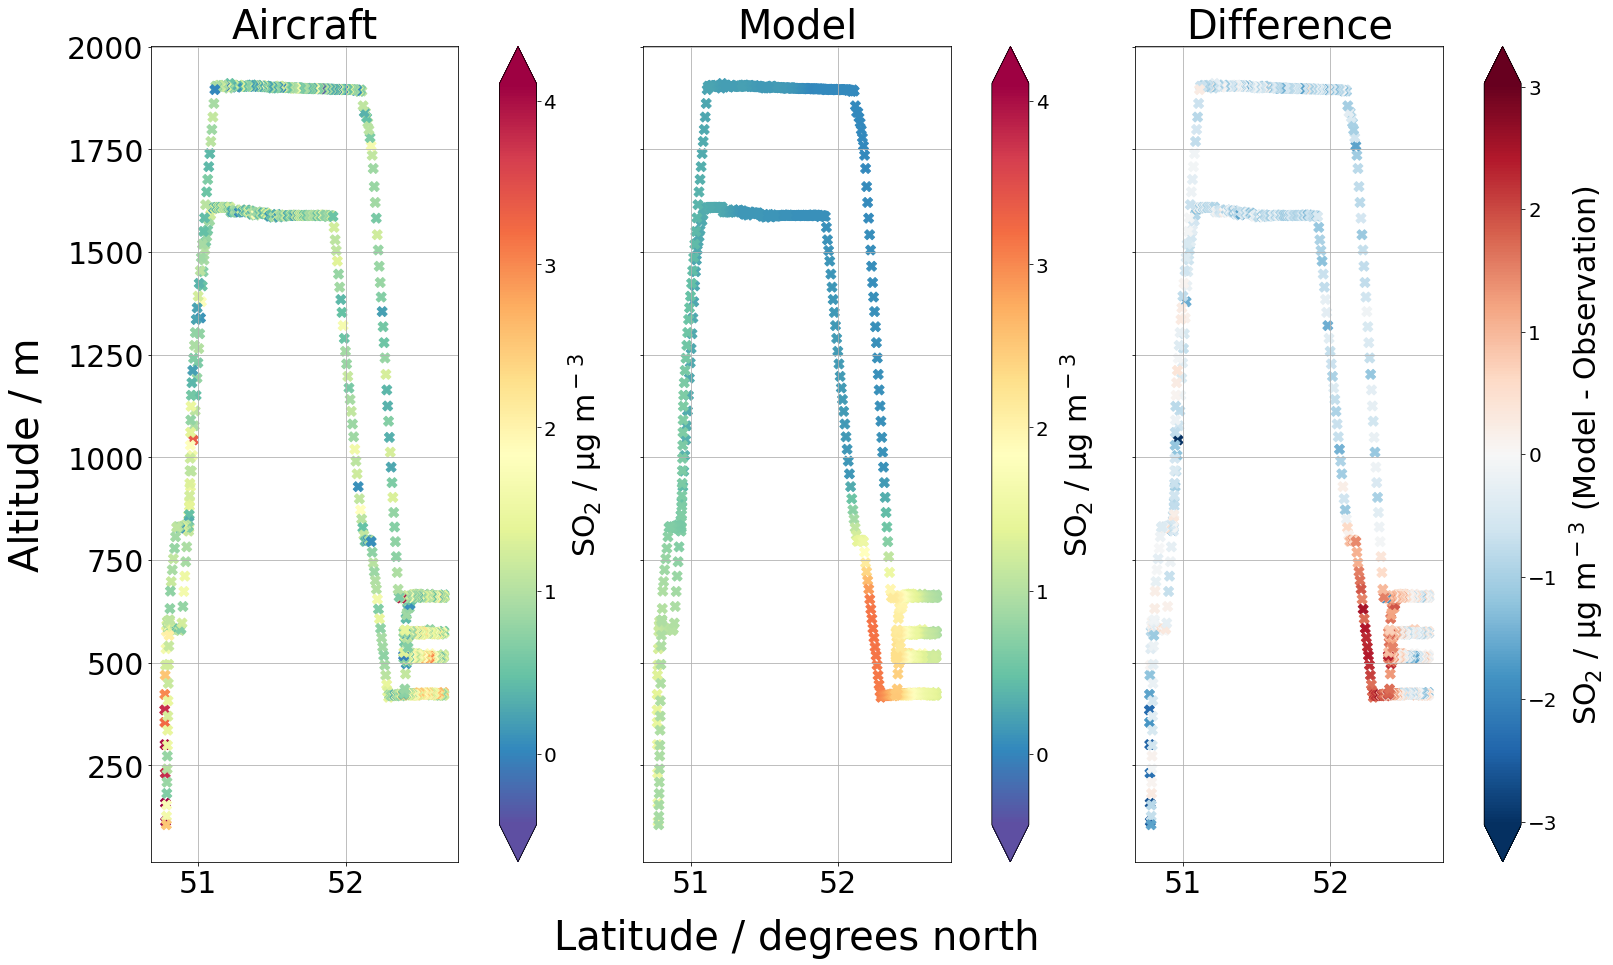

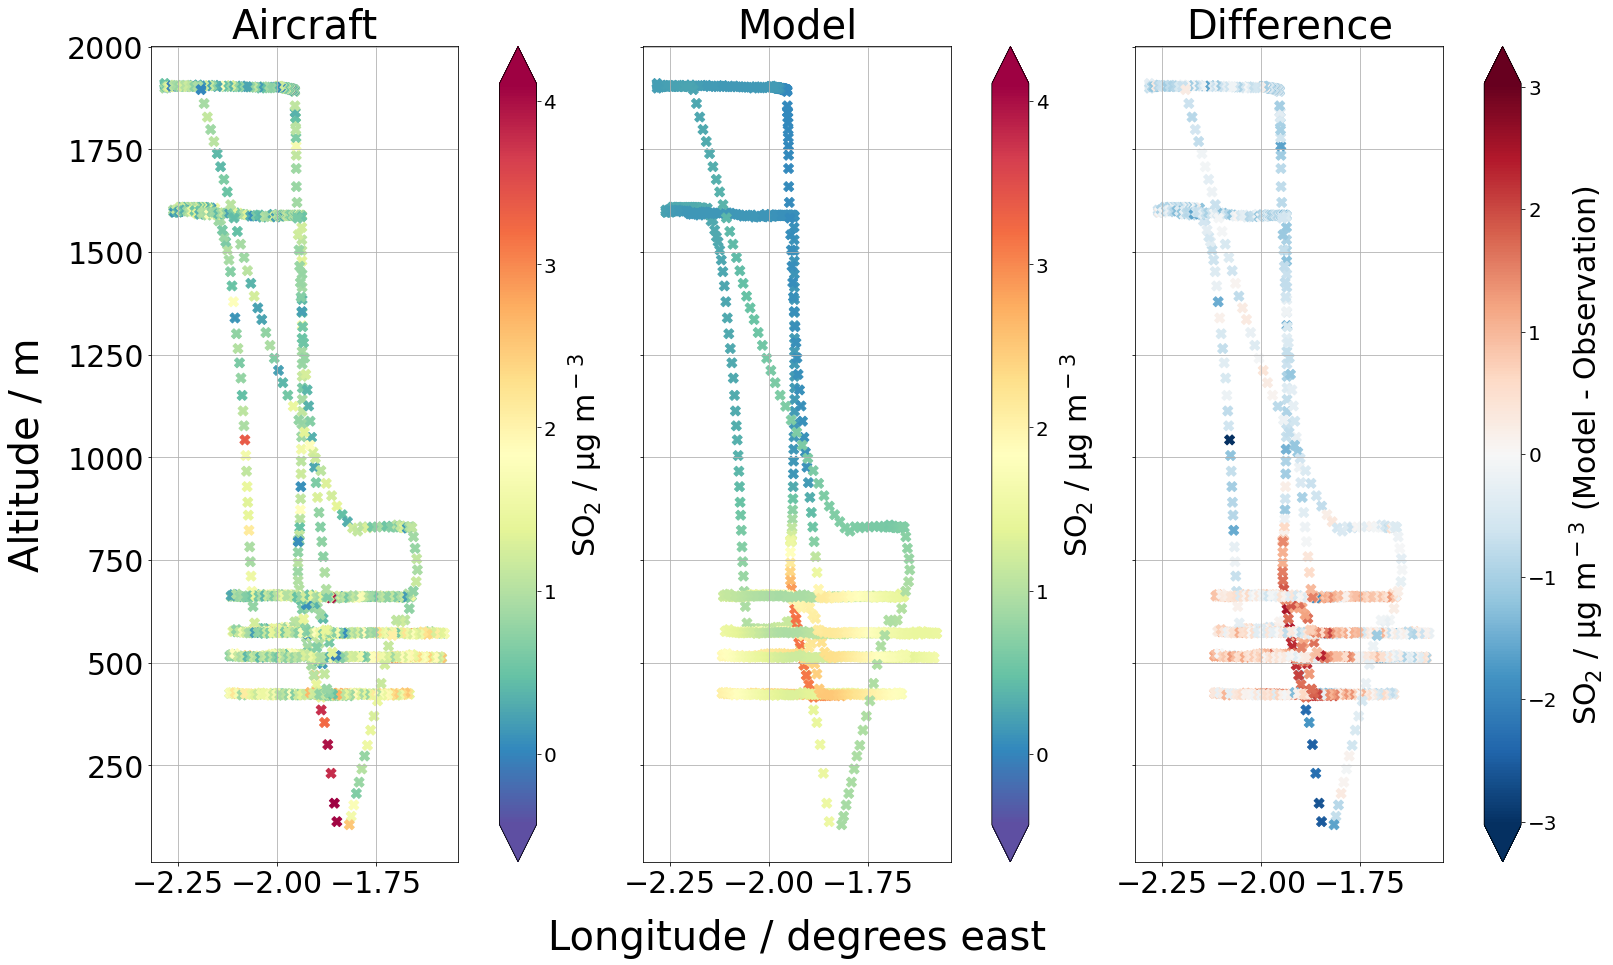

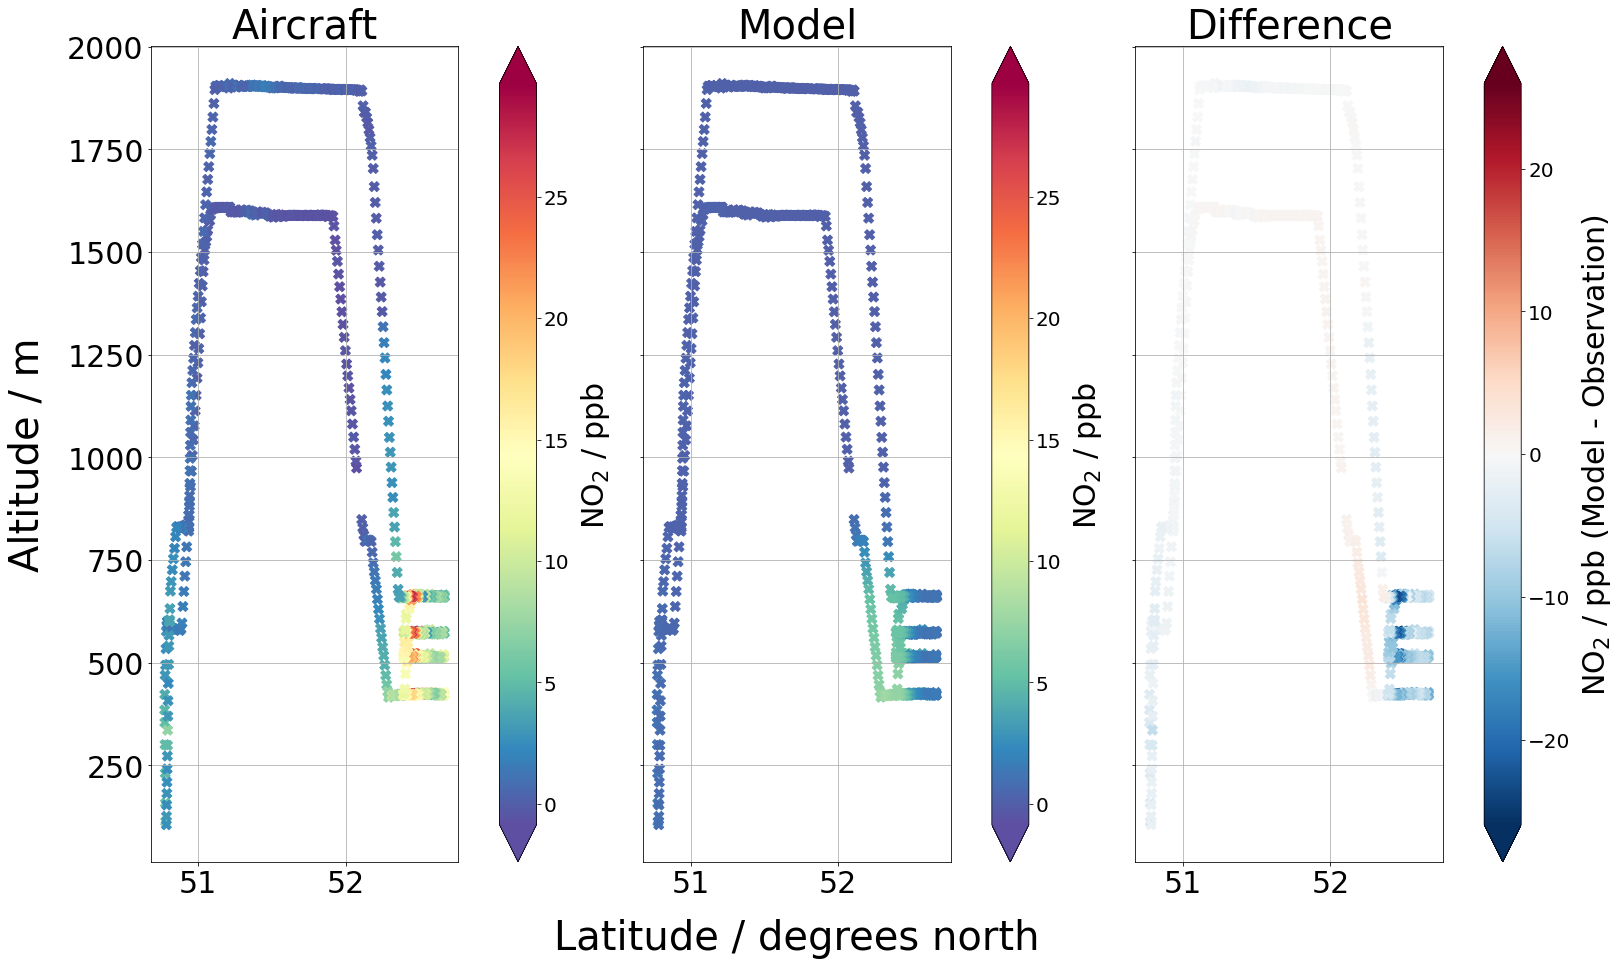

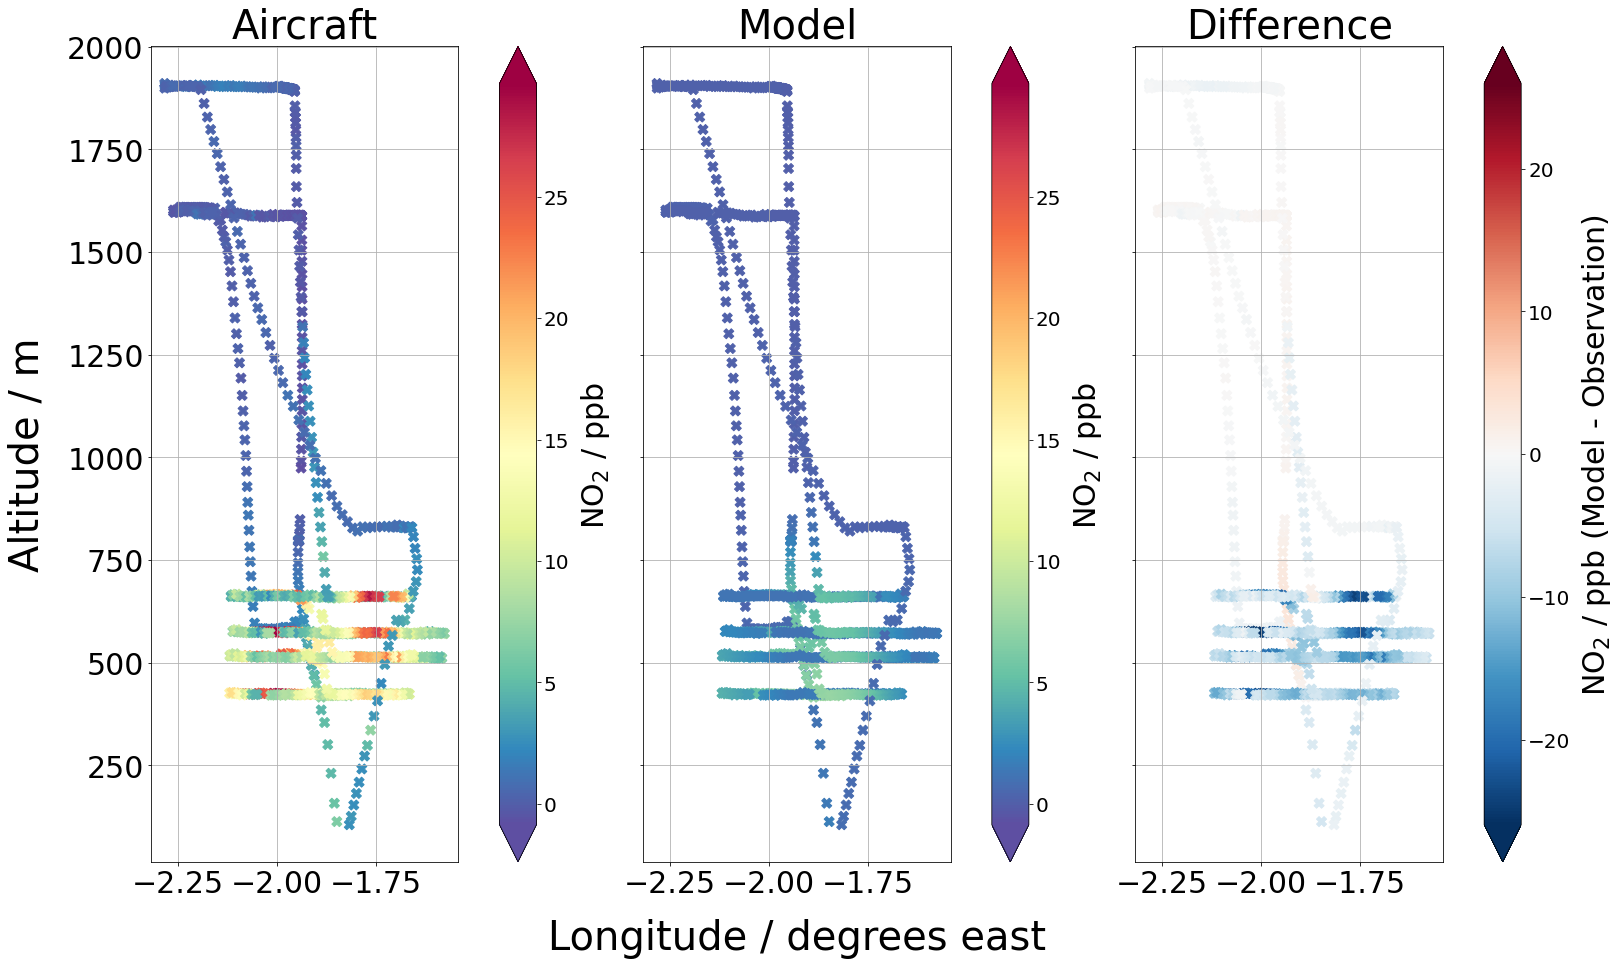

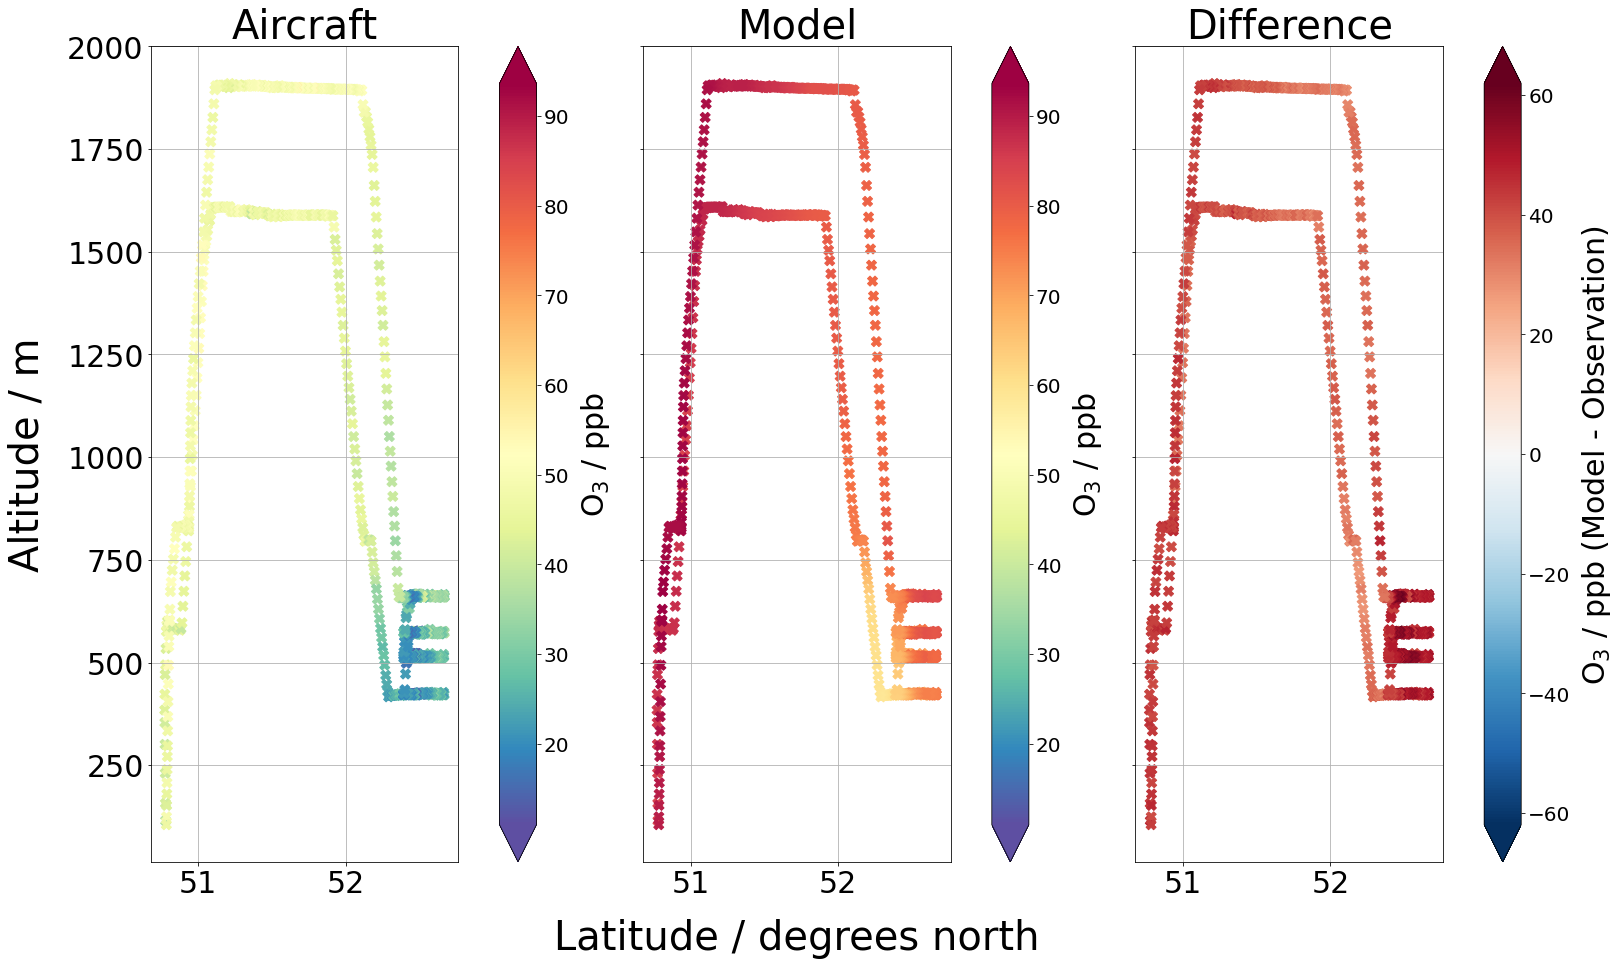

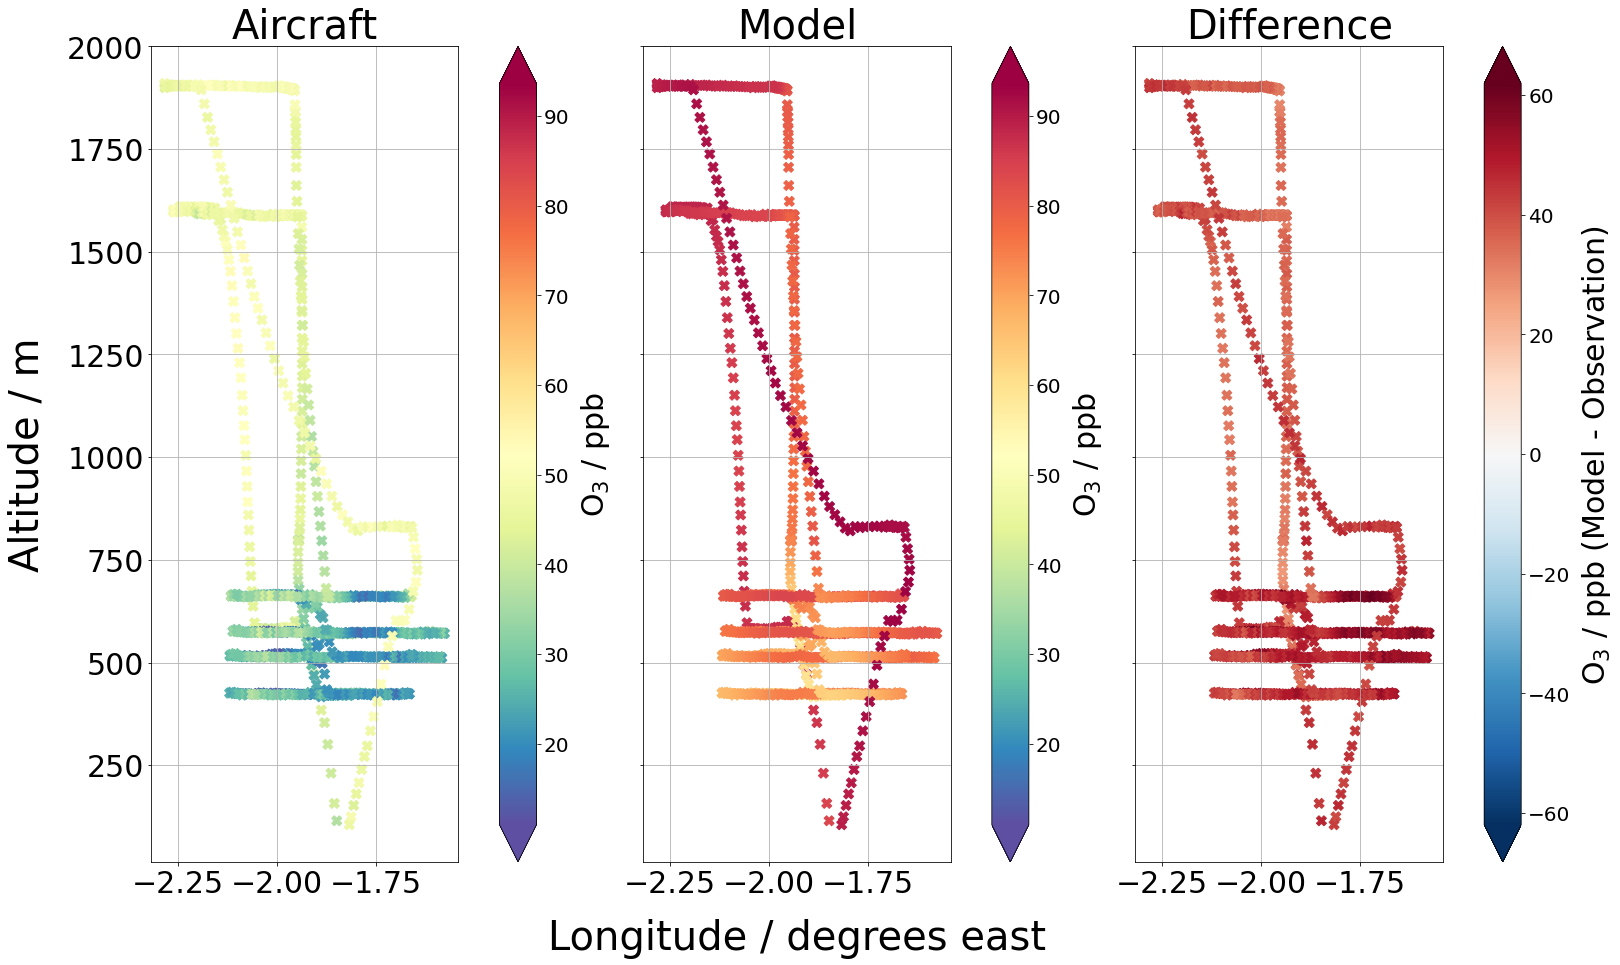

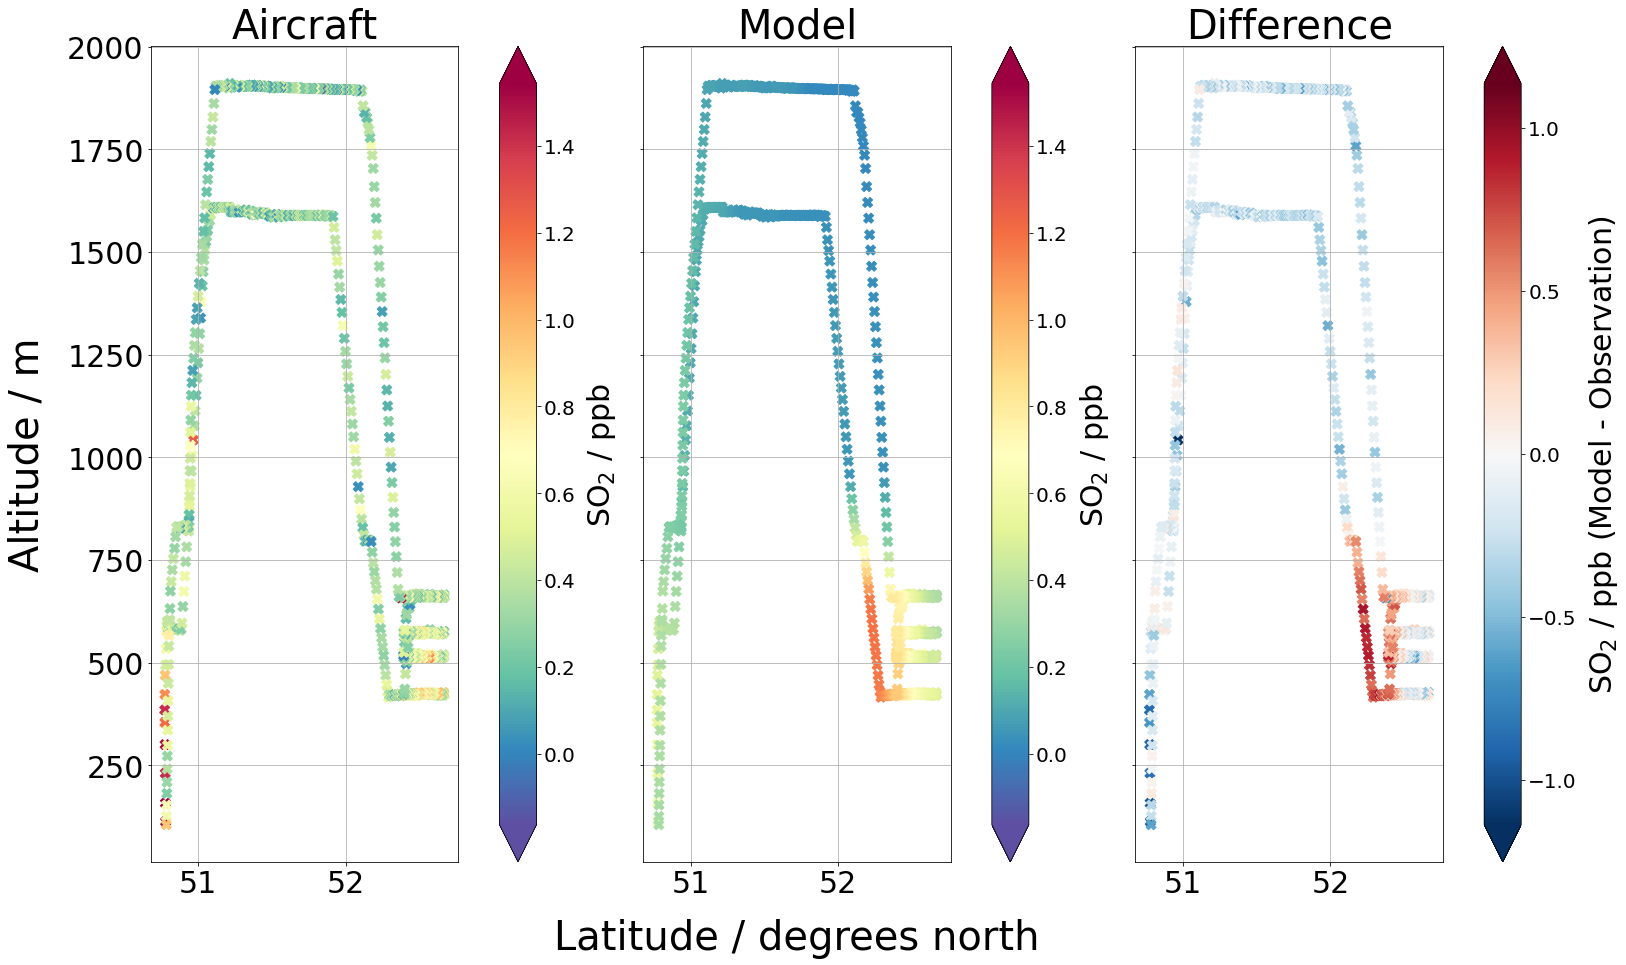

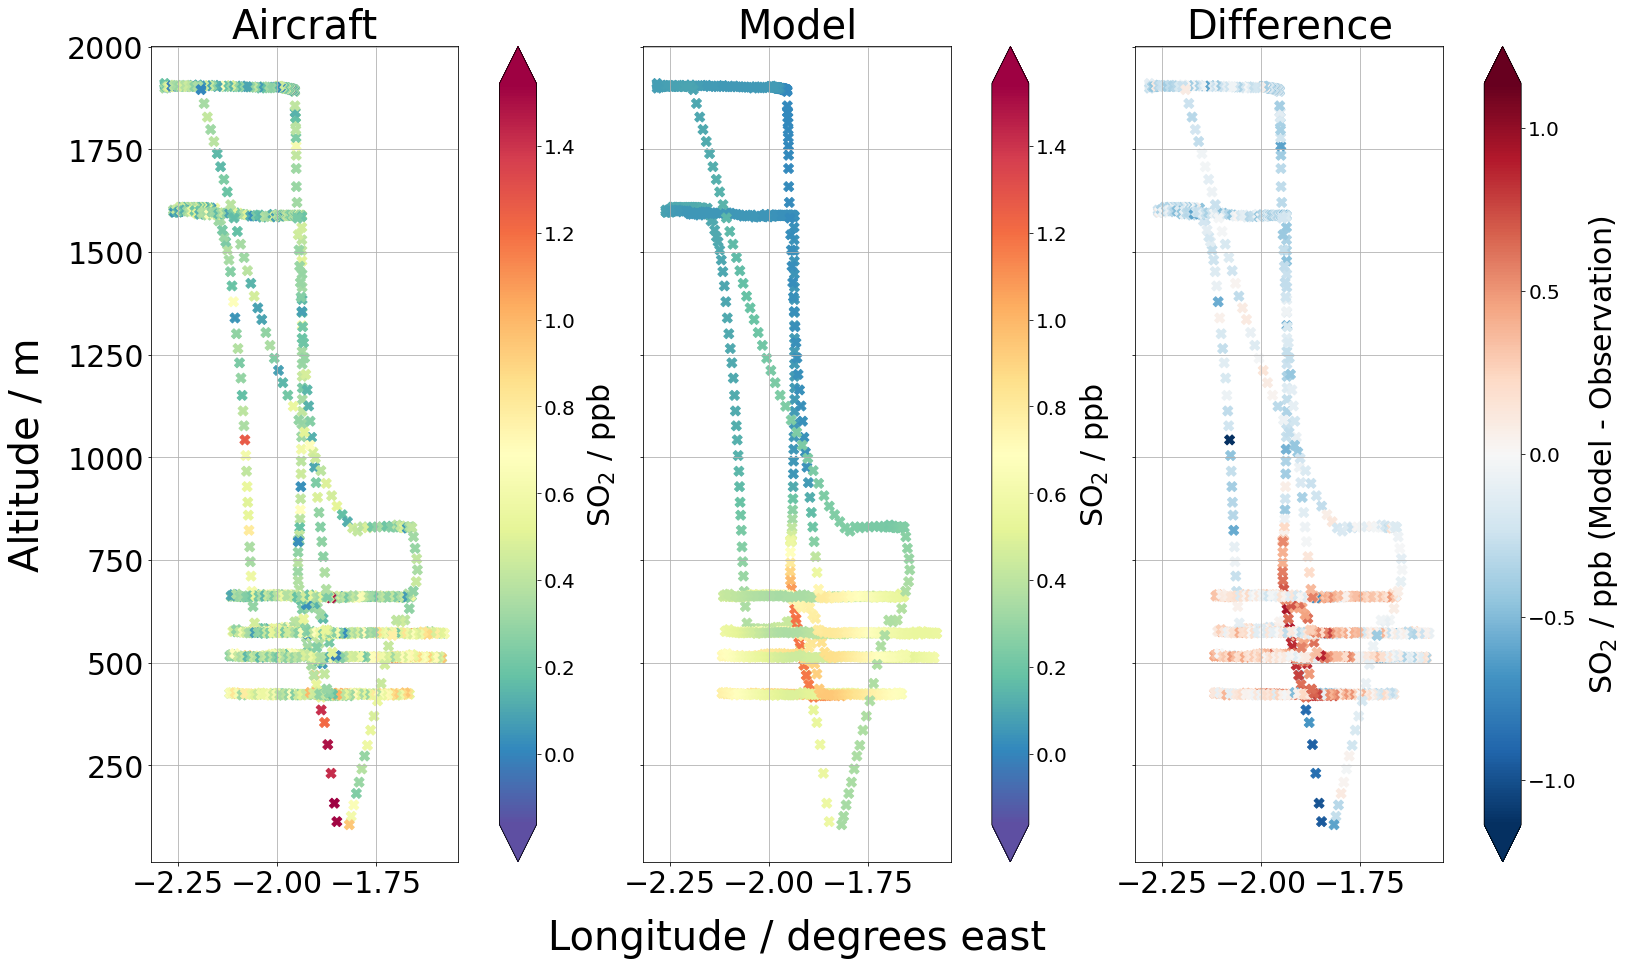

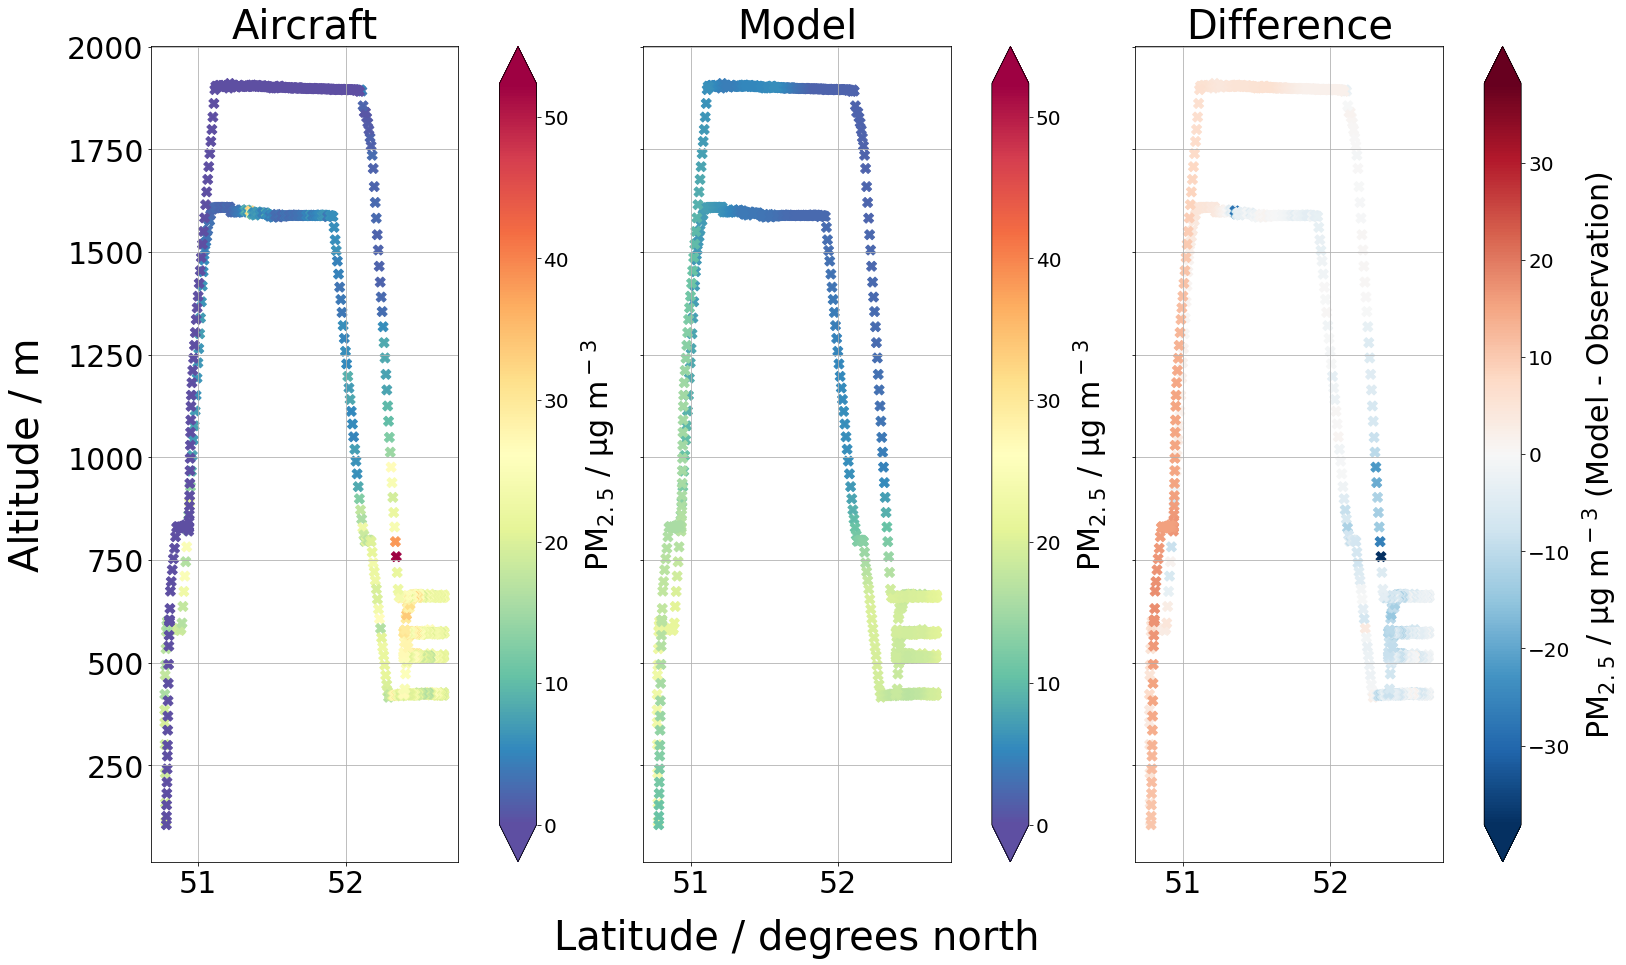

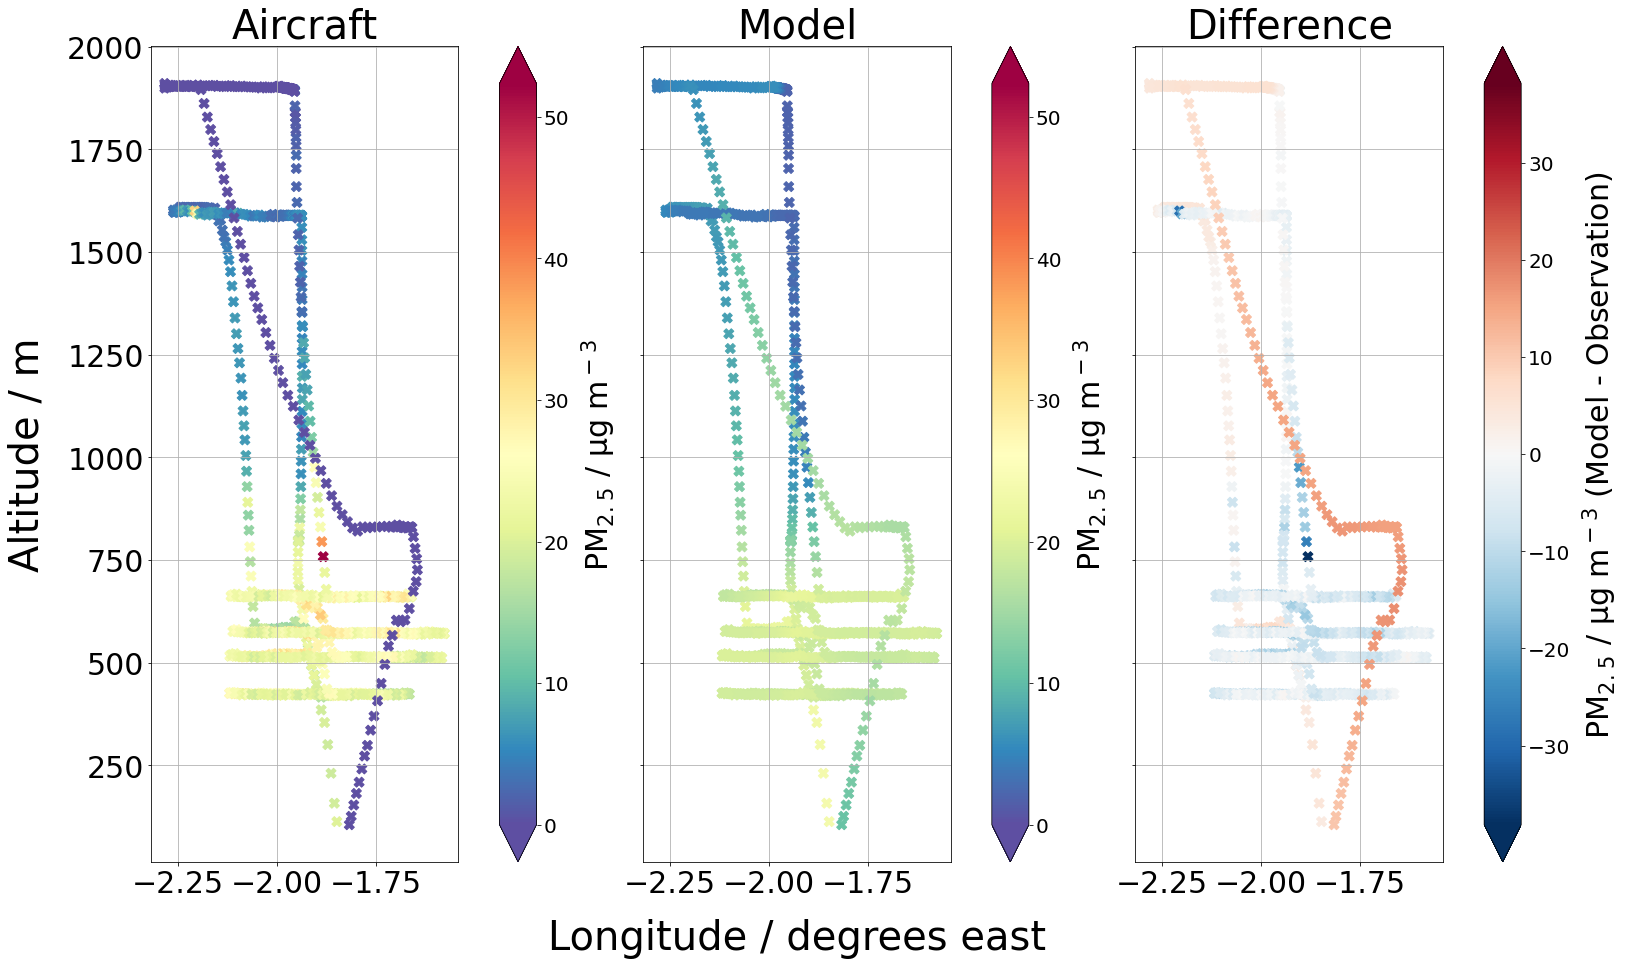

In [4]:
species_dict = pre.species_dictionary()
setup = pre.setup_notebook(flight_number)
optns = setup[6]
for key in species_dict.keys() :
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

        # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)

        # Resample the data.
    resample_df = pre.resample_data(df,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'])
    
    plot_curtain(resample_df,setup[5],key,label)